# Import Packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

In [2]:
runs = pd.read_csv('runs.csv')
races = pd.read_csv('races.csv')

# Data Prep

In [3]:
races = races[['race_id', 'horse_ratings']]

In [4]:
group_races = races[races['horse_ratings'] != 'G']

In [5]:
individual_race = group_races.merge(runs, how = 'inner', on = 'race_id')

In [6]:
class_5 = individual_race.loc[individual_race['horse_rating'] <= 40]
class_4 = individual_race[(individual_race['horse_rating'] > 40) & (individual_race['horse_rating'] <= 60)]
class_3 = individual_race[(individual_race['horse_rating'] > 60) & (individual_race['horse_rating'] <= 80)]
class_2 = individual_race[(individual_race['horse_rating'] > 80) & (individual_race['horse_rating'] <= 100)]
class_1 = individual_race[individual_race['horse_rating'] > 100]

In [7]:
store_list = []
class_list = [individual_race, class_1, class_2, class_3, class_4, class_5]
classes = ['All', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']

In [8]:
for (i, c) in zip (class_list, classes):
    temp = (i.groupby('horse_age', as_index=False).agg({'result':'mean', 'lengths_behind': 'mean', \
                                                        'won':['sum', 'count']}))                                   
    temp.columns  = ['Age', 'Average Finish Position', 'Behind Winner' ,'Races Won', 'Total Races']
    temp['Win%'] = temp['Races Won'] / temp['Total Races']
    format_mapping={'Average Finish Position' : '{:.1f}','Behind Winner': '{:.1f}', 'Win%': '{:.2f}'} 
    for key, value in format_mapping.items():
        temp[key] = temp[key].apply(value.format)
    temp['Average Finish Position'] = temp['Average Finish Position'].astype(float)
    temp['Behind Winner'] = temp['Behind Winner'].astype(float)
    temp['Win%'] = temp['Win%'].astype(float)
    temp['Class'] = c
    store_list.append(temp)

In [9]:
header = ['Overall', 'Class1', 'Class2', 'Class3', 'Class4', 'Class5']
iteration = [ 'Average Finish Position', 'Behind Winner', 'Win%']

In [10]:
combined = pd.concat(store_list)
combined.to_csv('Output_without_country.csv', index = False)

In [11]:
store_list_1 = []

In [12]:
for j in class_list:
    temp = (j.groupby(['horse_age', 'horse_country'], as_index=False).agg({'result':'mean', 'lengths_behind': 'mean',\
                                                                           'won':['sum', 'count']}))
    temp.columns  = ['Age', 'Country', 'Average Finish Position', 'Behind Winner' ,'Races Won', 'Total Races']
    temp['Win%'] = temp['Races Won'] / temp['Total Races']
    store_list_1.append(temp)

In [13]:
combined1 = pd.concat(store_list_1)
combined1.to_csv('Output_with_country.csv', index = False)

# Visusalizations

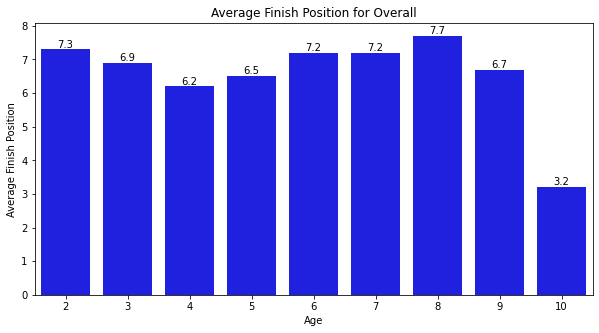

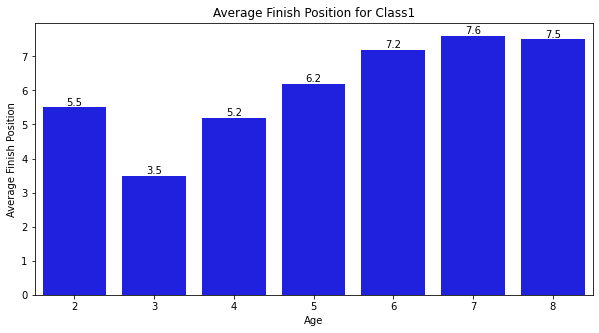

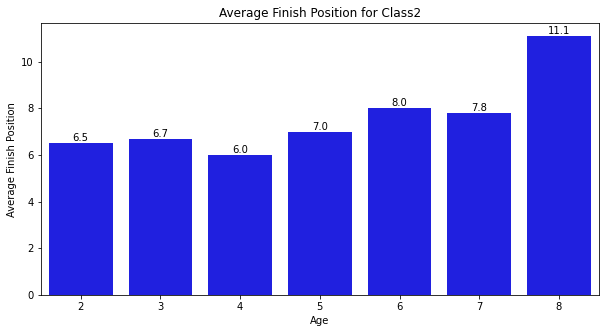

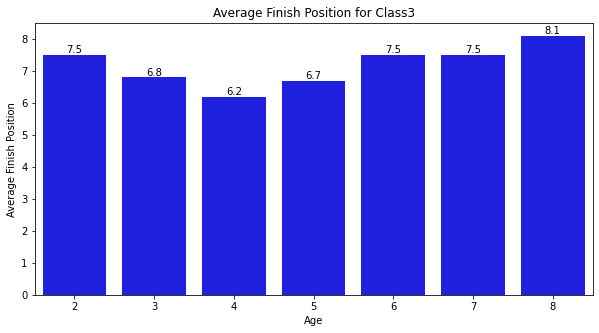

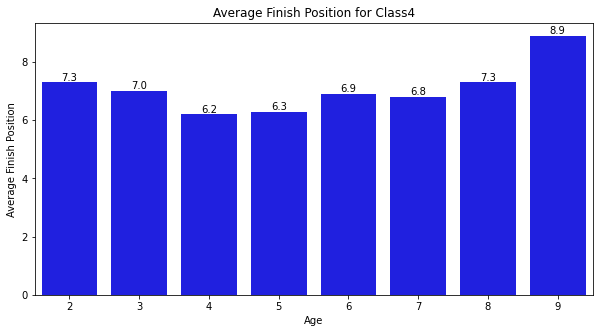

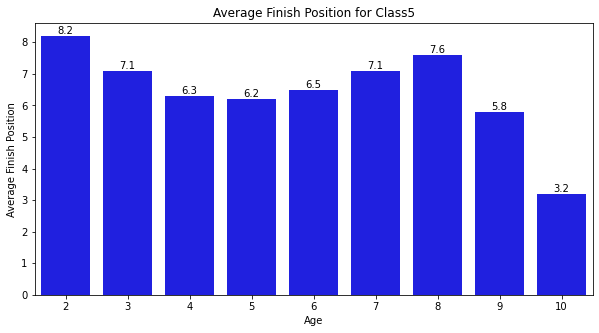

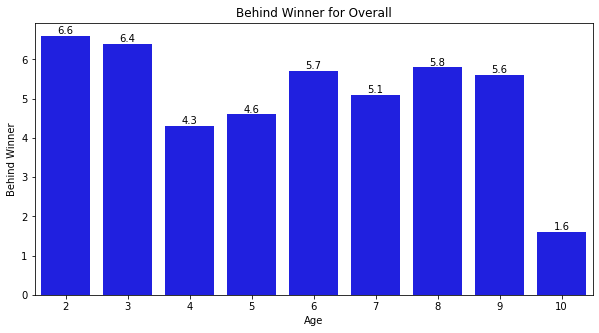

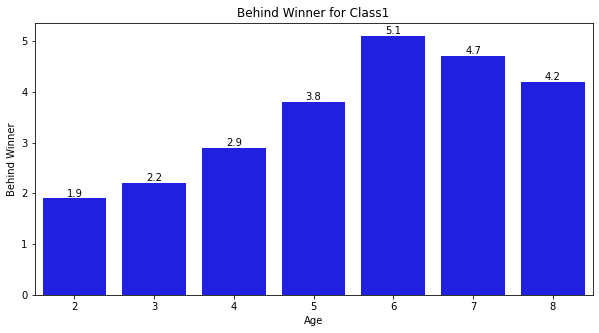

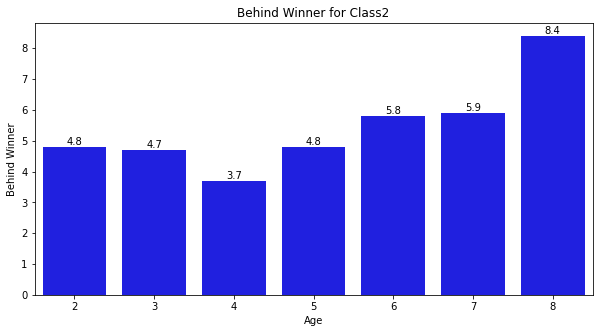

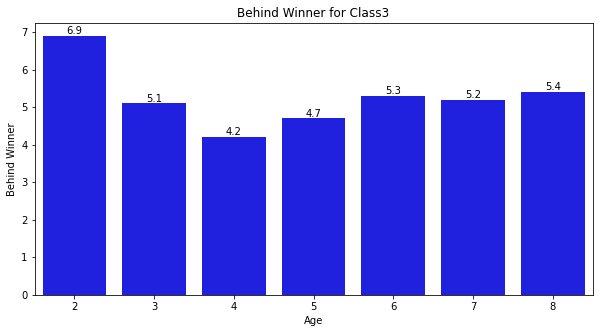

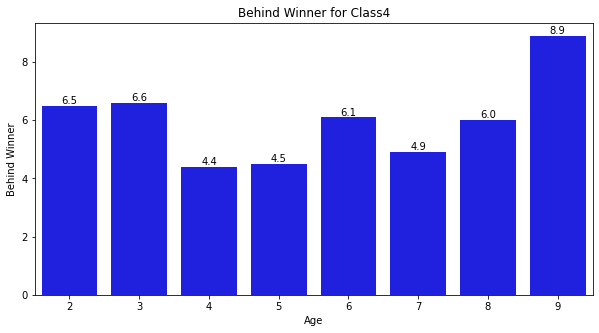

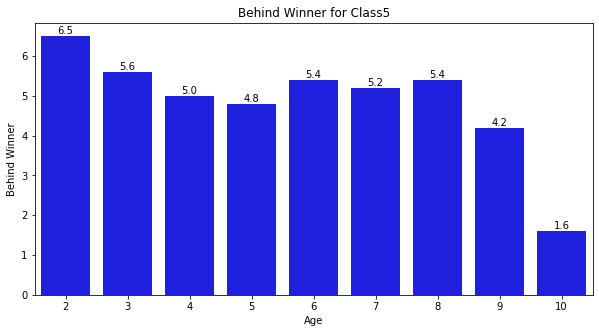

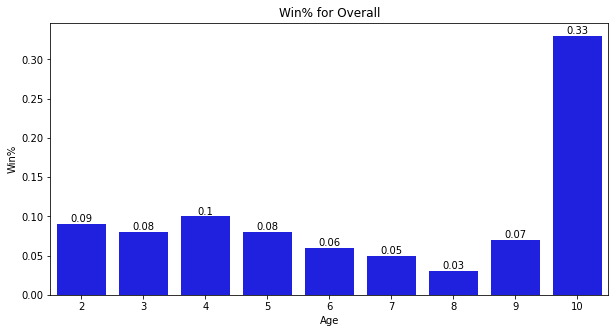

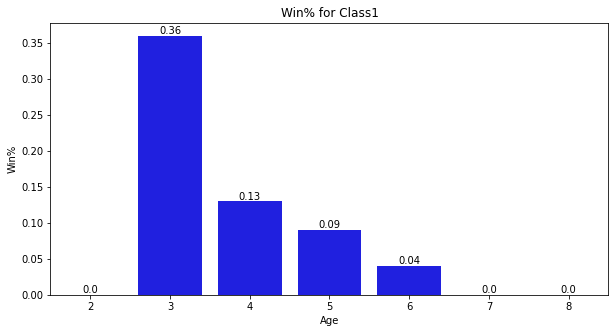

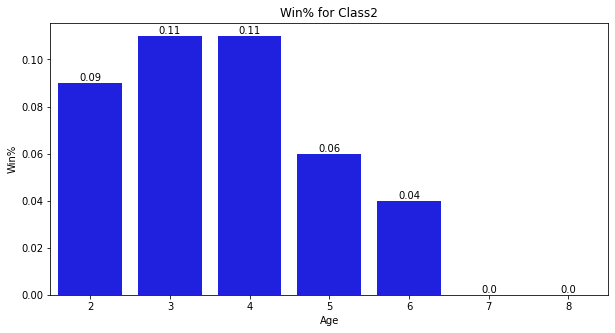

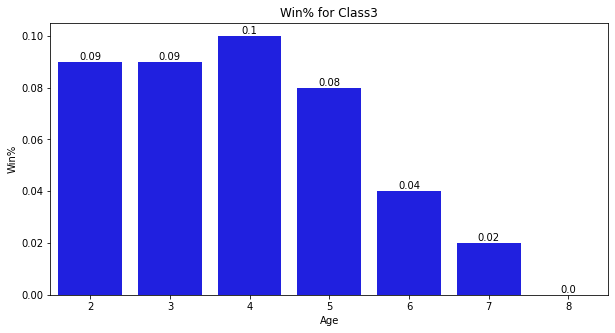

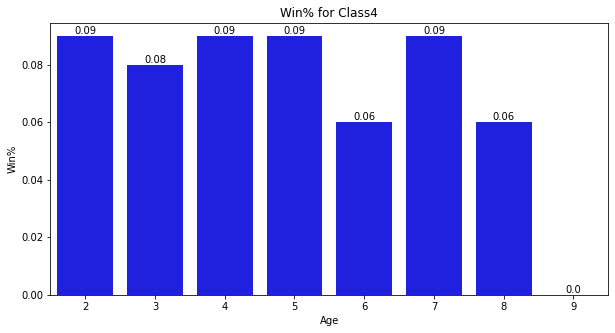

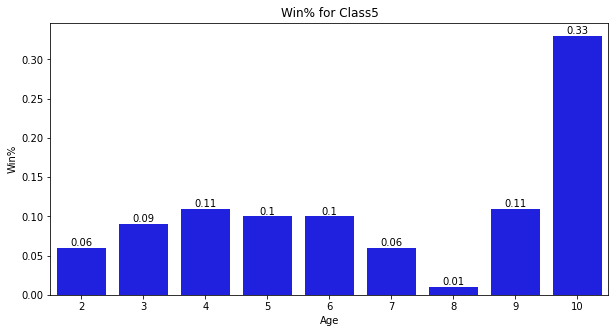

In [14]:
for m in iteration:
    for (j,k) in zip (store_list, header):
        plt.figure(figsize = (10,5))
        g = sns.barplot(x = 'Age', y = m, data = j, color = 'blue')
        for i in range (len(j['Age'])):
            plt.text(i, j[m][i], j[m][i], ha = 'center', va = 'bottom')
        g.set_title(str(m) + ' for ' + str(k))
        g.figure.savefig(str(m) + ' for ' + str(k) + '.png')

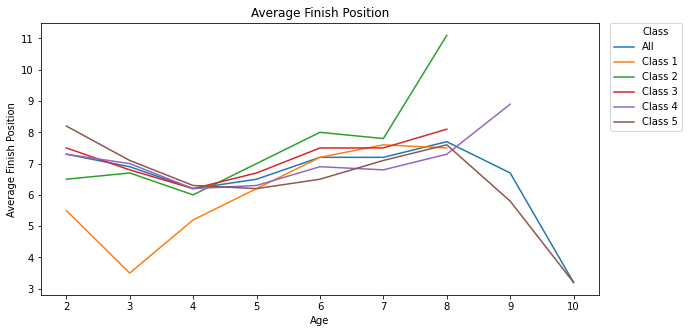

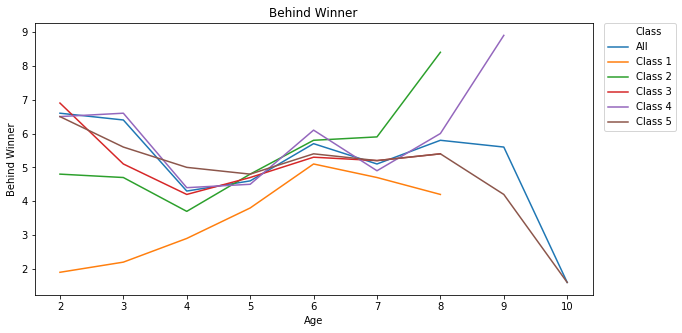

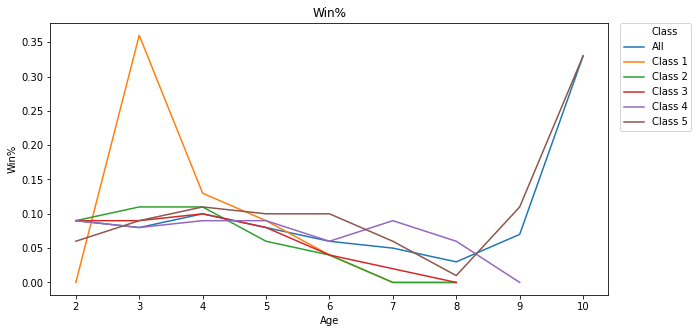

In [15]:
for q in iteration:
    plt.figure(figsize = (10,5))
    g = sns.lineplot(x = 'Age', y = q, hue = 'Class', data = combined)
    g.set_title(str(q))
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    g.figure.savefig(str(q) + '.png')

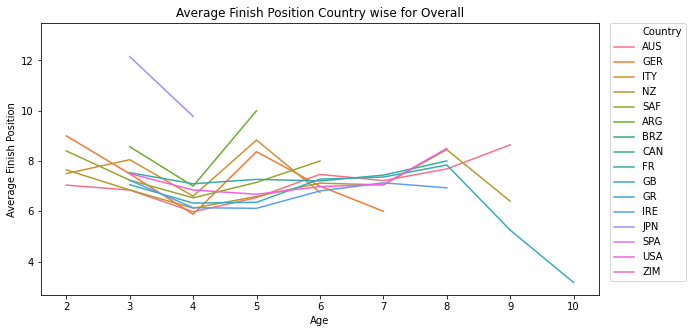

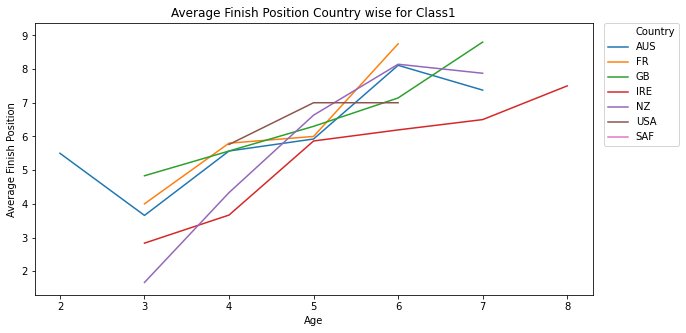

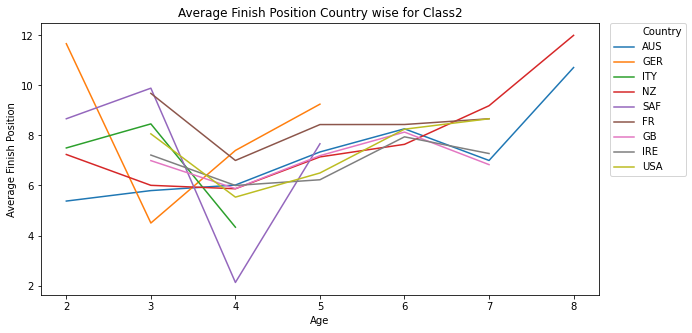

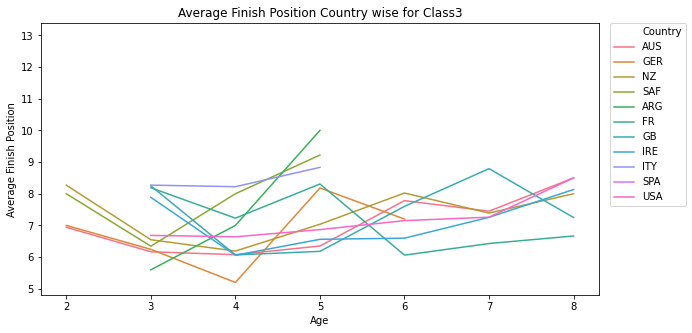

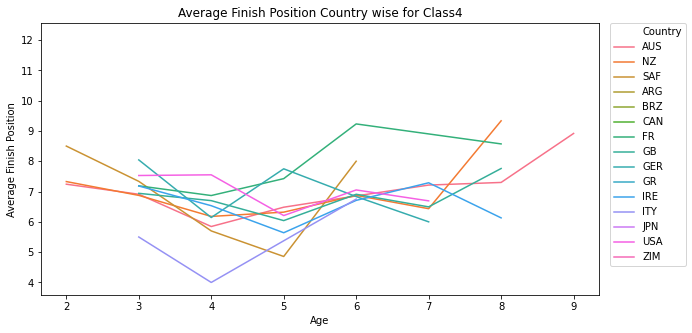

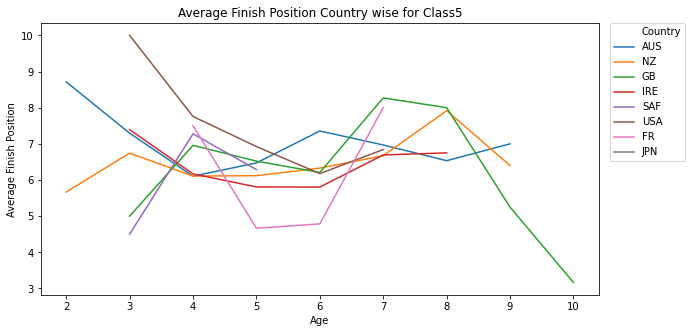

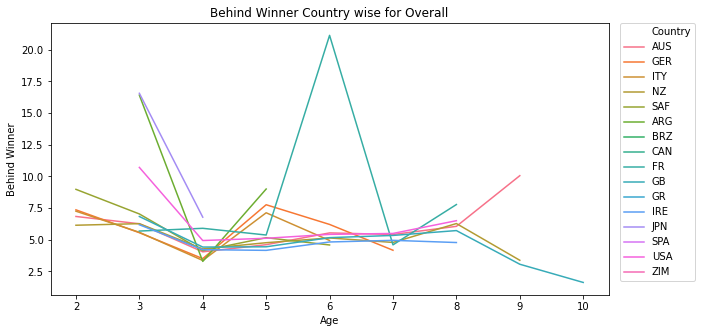

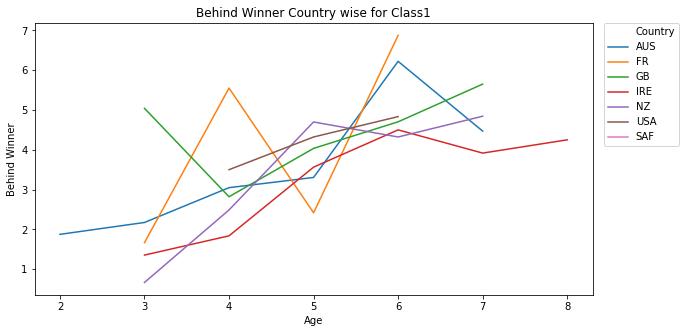

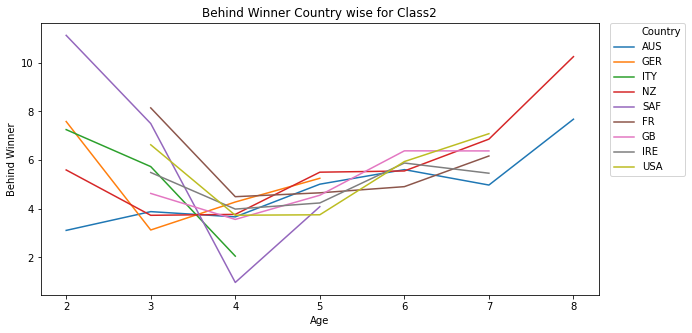

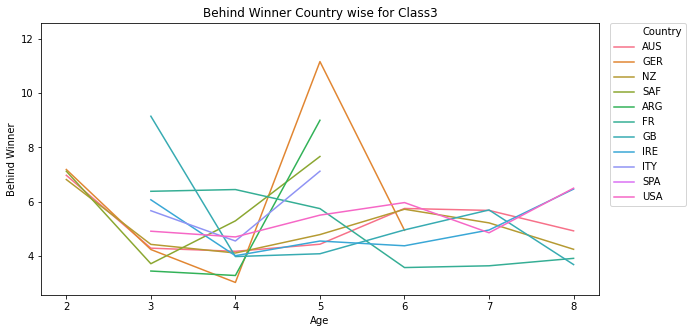

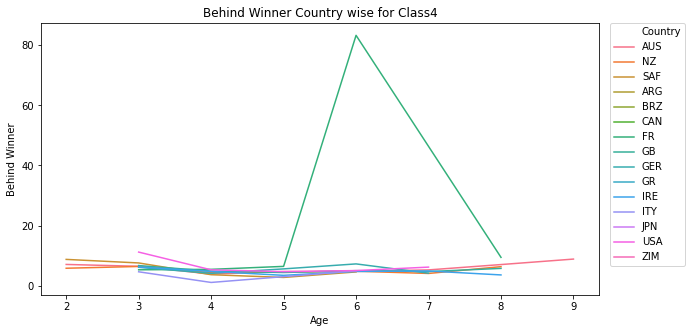

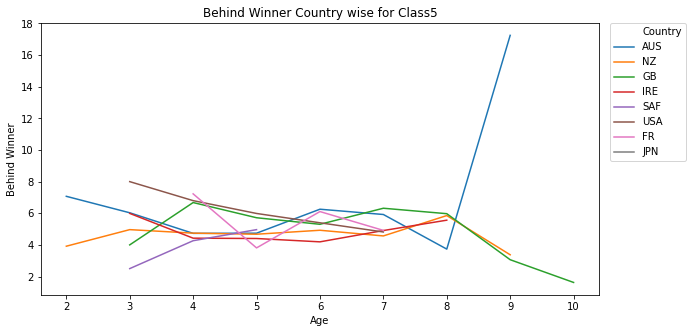

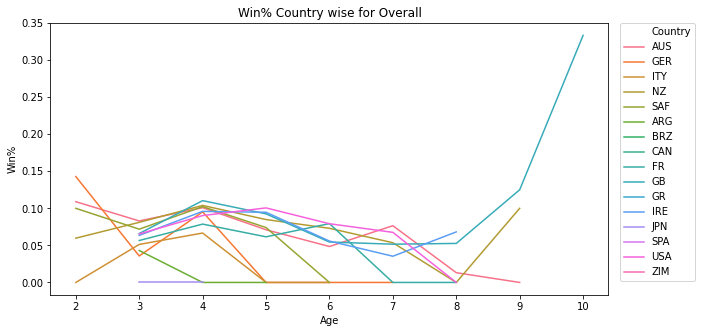

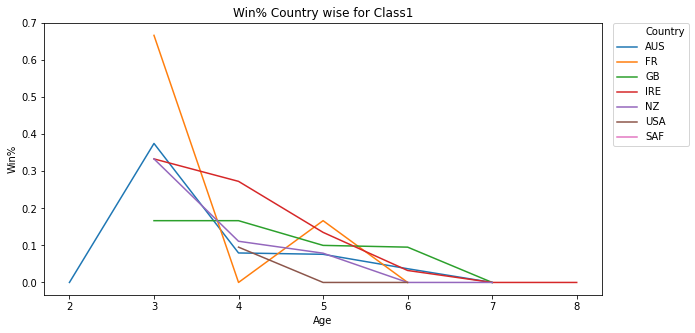

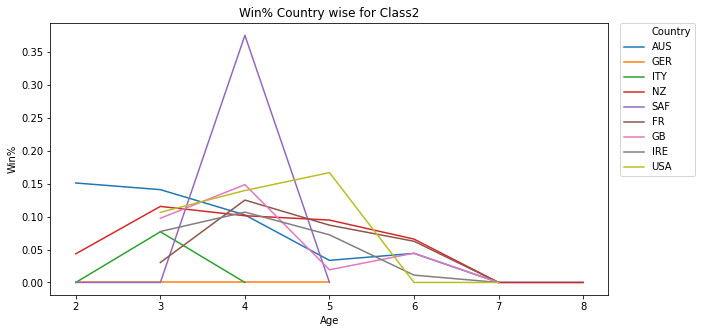

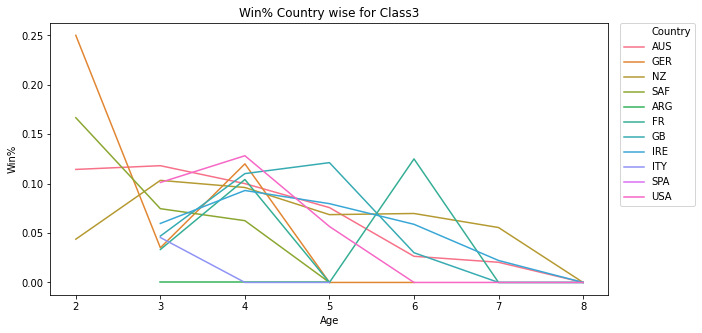

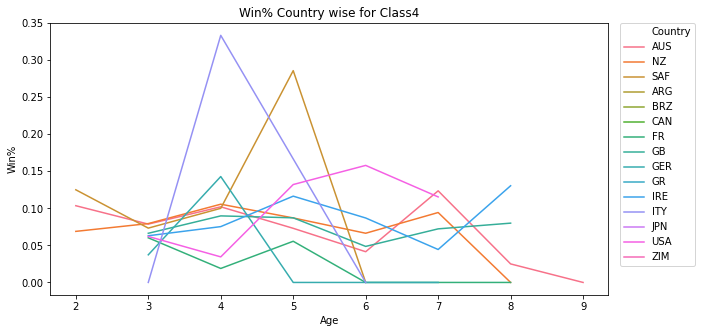

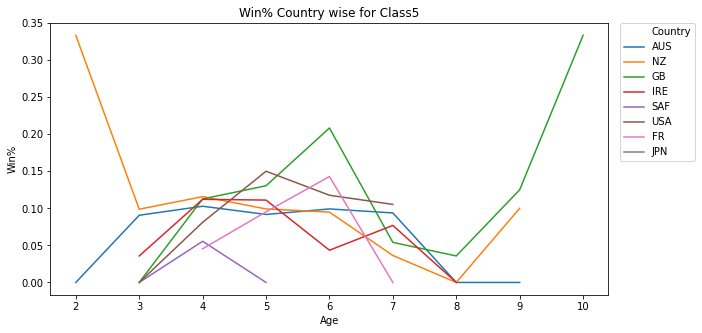

In [16]:
for m in iteration:
    for (j,k) in zip (store_list_1, header):
        plt.figure(figsize = (10,5))
        g = sns.lineplot(x = 'Age', y = m, hue = 'Country', data = j)
        g.set_title(str(m) + ' Country wise for ' + str(k))
        plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
        g.figure.savefig(str(m) + ' Country wise for ' + str(k) + '.png')

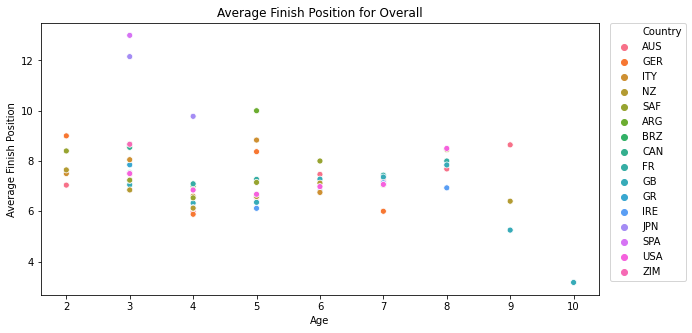

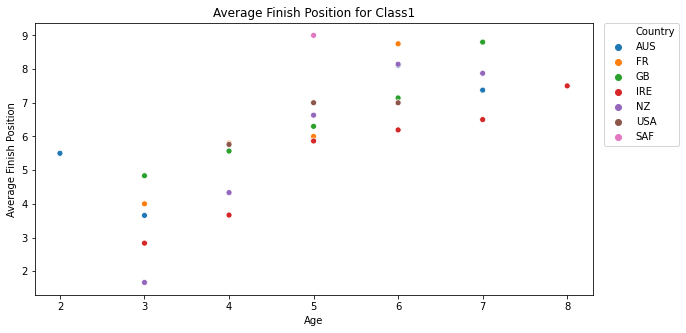

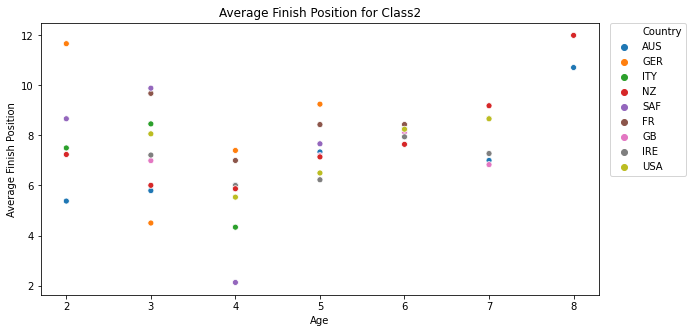

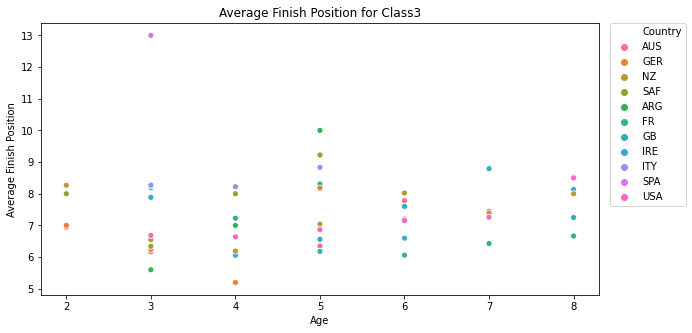

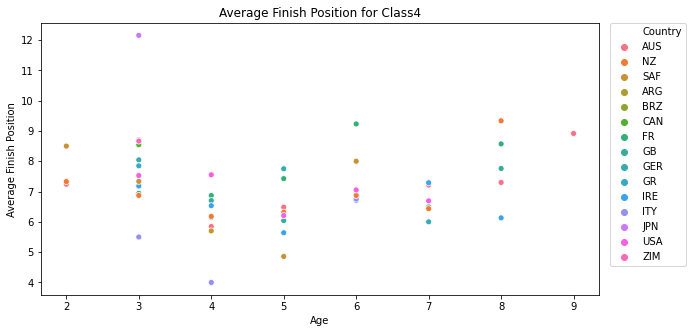

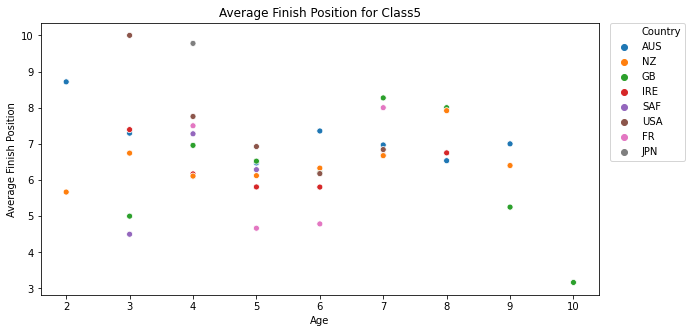

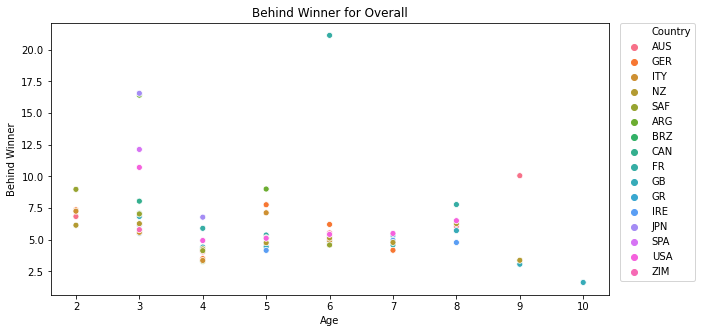

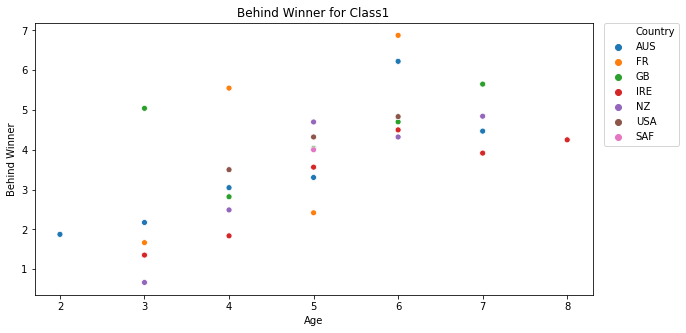

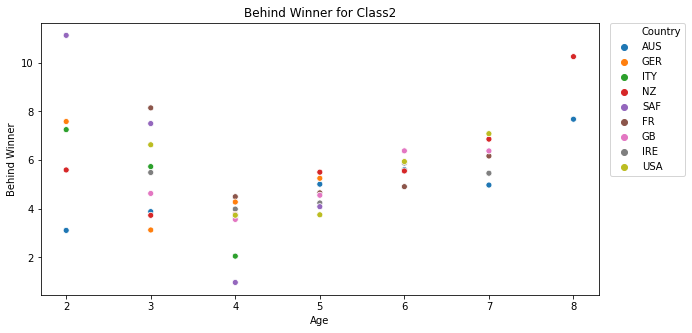

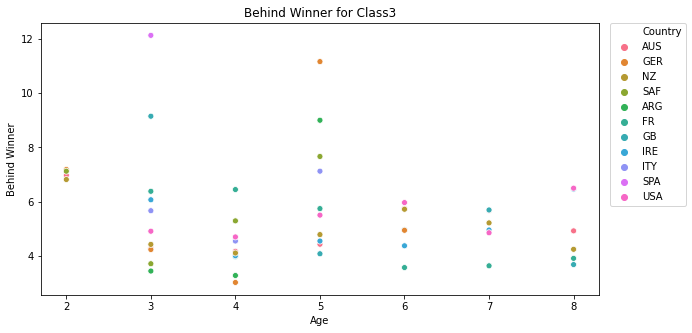

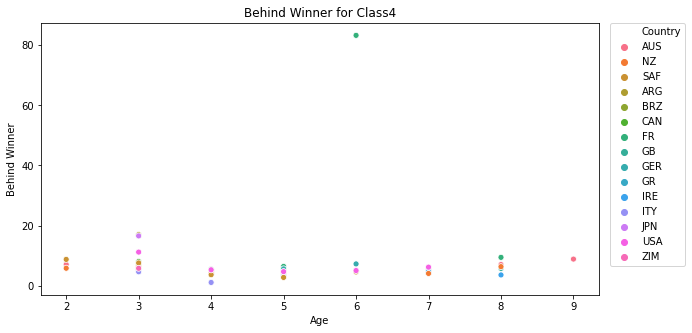

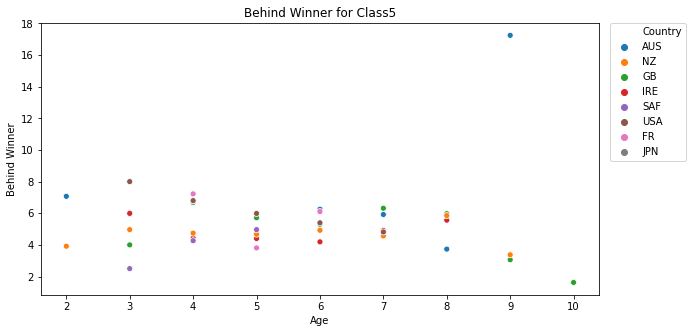

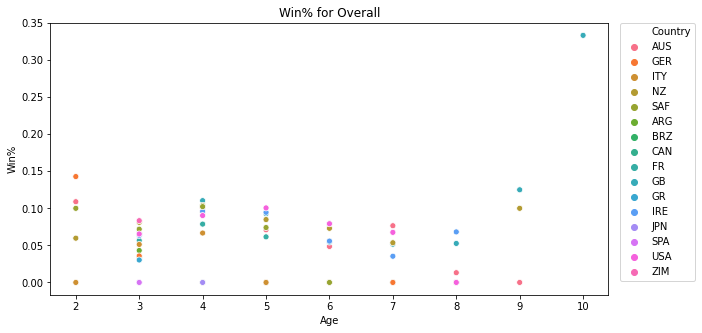

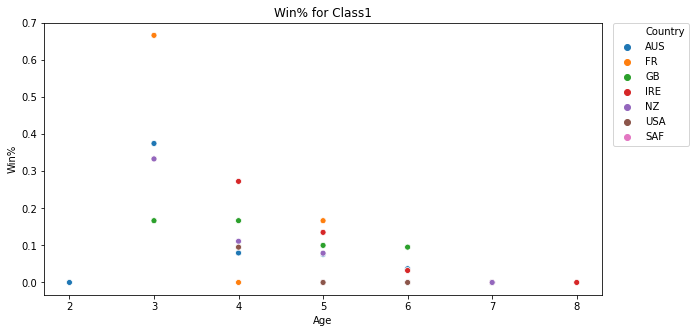

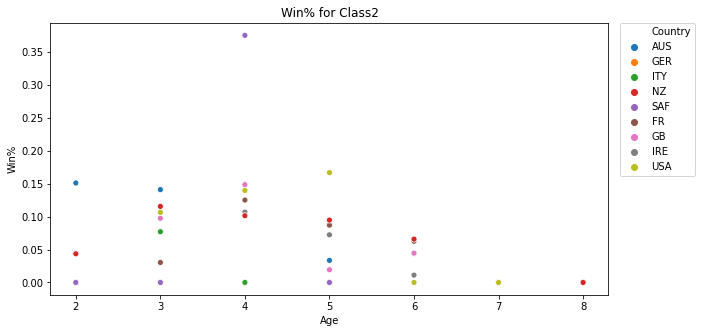

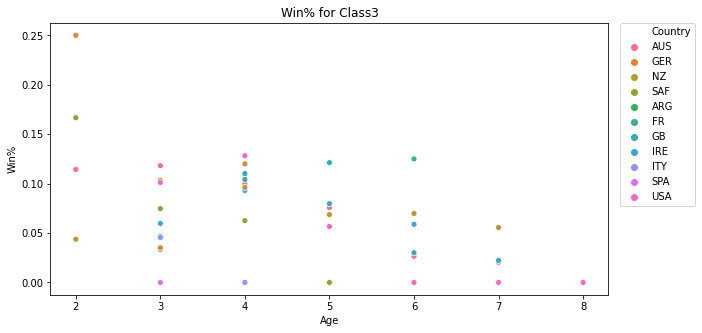

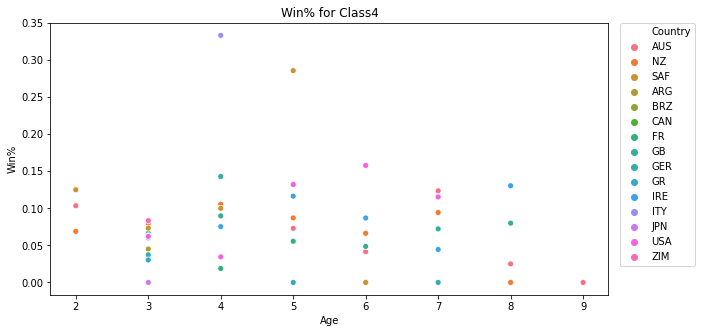

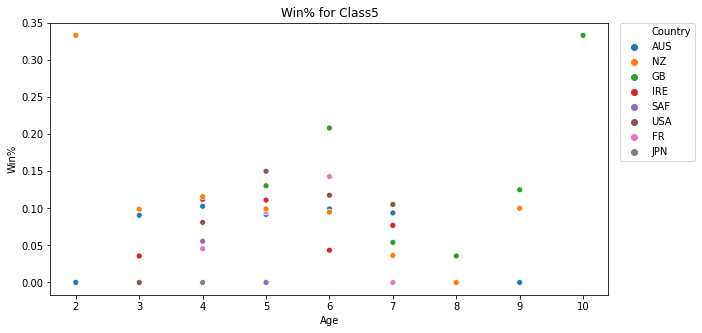

In [17]:
for m in iteration:
    for (j,k) in zip (store_list_1, header):
        plt.figure(figsize = (10,5))
        g = sns.scatterplot(x = 'Age', y = m, hue = 'Country', data = j)
        g.set_title(str(m) + ' for ' + str(k))
        plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
        g.figure.savefig(str(m) + ' Country wise for ' + str(k) + '.png')